## Explore Zillow Dataset Exercises - Clustering Module

---

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from wrangle_zillow import acquire_zillow
from wrangle_zillow import missing_col_values
from wrangle_zillow import missing_row_values
from wrangle_zillow import single_unit_properties
from wrangle_zillow import data_prep

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
#acquire the dataset
df = acquire_zillow()
df.head()

Reading from csv file...


,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [4]:
df.shape

(77381, 68)

In [5]:
#wrangle the dataset
df = single_unit_properties(df)
remove_cols = ['buildingqualitytypeid', 'heatingorsystemtypeid', 'propertyzoningdesc', 'heatingorsystemdesc']
df = data_prep(df, cols_to_remove=remove_cols, prop_required_column=.5, prop_required_row=.75)
df.head()


,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,122,261.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,1110,261.0,6.111001e+07,13091.0,2061.0,97099.0,5.0,1.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,261.0,6.059022e+07,21412.0,1286.0,97078.0,6.0,1.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,261.0,6.037300e+07,396551.0,3101.0,96330.0,0.0,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
6,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,261.0,6.037461e+07,47019.0,3101.0,96293.0,0.0,1.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential


In [6]:
df.shape

(50973, 30)

In [7]:
#split the dataset
train_val, test = train_test_split(df, train_size = 0.8, random_state=123)
train, validate = train_test_split(train_val, train_size = 0.7, random_state=123)
train.shape, validate.shape, test.shape

((28544, 30), (12234, 30), (10195, 30))

---

##### Question 1:
- Is logerror significantly different for properties from the three different counties represented in the dataset?

In [8]:
train.fips.value_counts()

6037.0    18334
6059.0     7644
6111.0     2566
Name: fips, dtype: int64

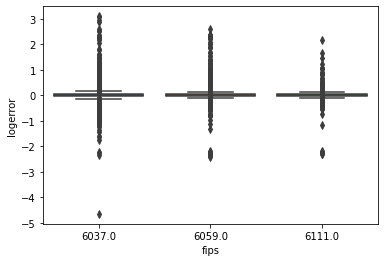

In [13]:

sns.boxplot(train.fips, train.logerror)
plt.show()

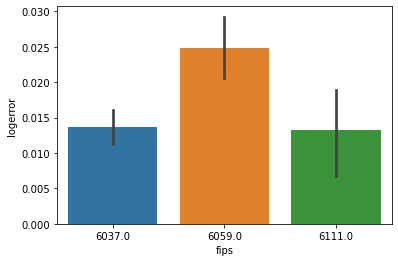

In [10]:
sns.barplot(train.fips, train.logerror)
plt.show()

In [17]:
#assign an alpha value
alpha = 0.05
#assign the x and y variables from the train dataset
x = train.fips
y = train.logerror
#run a pearson r correlation test
corr, p = stats.pearsonr(x, y)
#output the results of the test
print(f'Correlation Coefficient = {corr} P-Value = {p}')
print('-----------------------------------')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

Correlation Coefficient = 0.007204913772423502 P-Value = 0.2235165342109675
-----------------------------------
We do not reject the null hypothesis


---

##### Question 2:
- Is the square footage of the home related to the logerror?

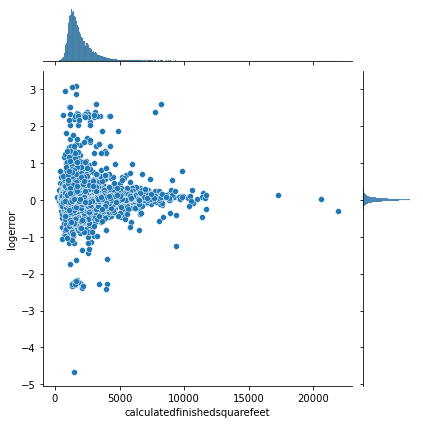

In [14]:
sns.jointplot(x="calculatedfinishedsquarefeet", y="logerror", data=train)
plt.xlabel("home sqr foot")
plt.ylabel("log error")
plt.show()

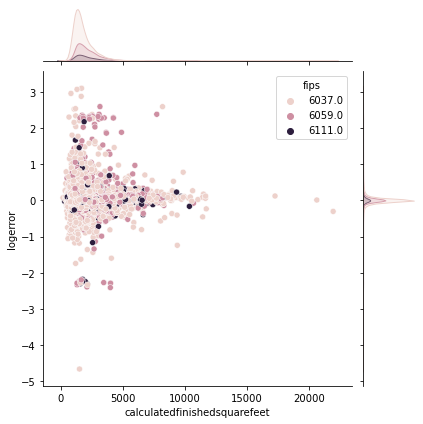

In [32]:
sns.jointplot(x="calculatedfinishedsquarefeet", y="logerror", hue="fips", data=train)
plt.xlabel("home sqr foot")
plt.ylabel("log error")
plt.show()

In [18]:
#assign an alpha value
alpha = 0.05
#assign the x and y variables from the train dataset
x = train.calculatedfinishedsquarefeet
y = train.logerror
#run a pearson r correlation test
corr, p = stats.pearsonr(x, y)
#output the results of the test
print(f'Correlation Coefficient = {corr} P-Value = {p}')
print('-----------------------------------')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

Correlation Coefficient = 0.035034087701974026 P-Value = 3.208537667574552e-09
-----------------------------------
We reject the null hypothesis


---

##### Question 3:
- Is the city the property is located in related to the logerror?


In [22]:
train.regionidcity.value_counts()

12447.0     6262
5534.0       988
40227.0      858
46298.0      805
16764.0      588
            ... 
31134.0        2
118880.0       2
3491.0         2
33312.0        2
10815.0        1
Name: regionidcity, Length: 173, dtype: int64

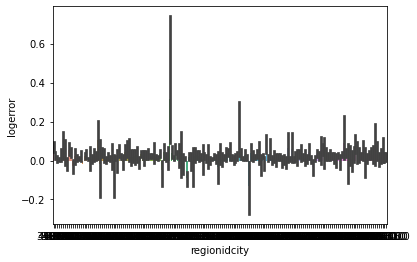

In [20]:
sns.barplot(train.regionidcity, train.logerror)
plt.show()

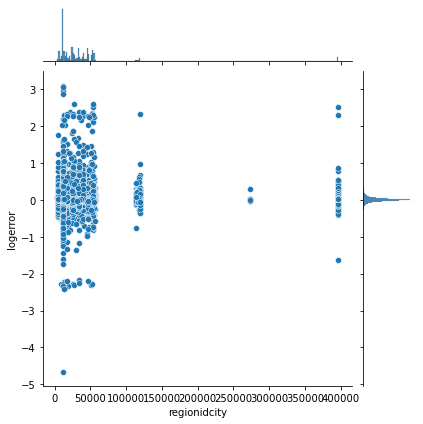

In [21]:
sns.jointplot(x="regionidcity", y="logerror", data=train)
plt.xlabel("city id")
plt.ylabel("log error")
plt.show()

In [26]:
#assign an alpha value
alpha = 0.05
#assign the x and y variables from the train dataset
x = train.regionidcity
y = train.logerror
#run a pearson r correlation test
corr, p = stats.pearsonr(x, y)
#output the results of the test
print(f'Correlation Coefficient = {corr} P-Value = {p}')
print('-----------------------------------')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

Correlation Coefficient = 0.010526154871358443 P-Value = 0.07534441070414724
-----------------------------------
We do not reject the null hypothesis


---

##### Question 4:
-Is property type related to log error?

In [24]:
train.propertylandusedesc.value_counts()

Single Family Residential                     28338
Cluster Home                                    166
Mobile Home                                      35
Manufactured, Modular, Prefabricated Homes        5
Name: propertylandusedesc, dtype: int64

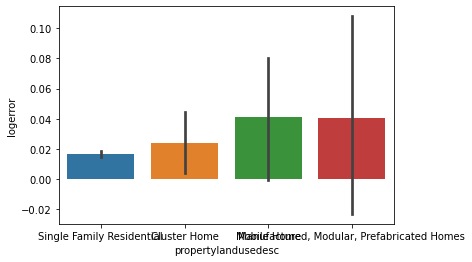

In [25]:
sns.barplot(train.propertylandusedesc, train.logerror)
plt.show()

In [28]:
#assign an alpha value
alpha = 0.05
#assign the x and y variables from the train dataset
x = train.propertylandusetypeid
y = train.logerror
#run a pearson r correlation test
corr, p = stats.pearsonr(x, y)
#output the results of the test
print(f'Correlation Coefficient = {corr} P-Value = {p}')
print('-----------------------------------')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

Correlation Coefficient = 0.004656629220777413 P-Value = 0.43145404619290517
-----------------------------------
We do not reject the null hypothesis


---

##### Question 5:
- Is the year the property was built related to logerror?

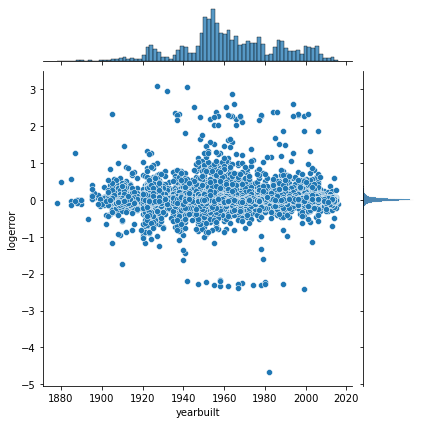

In [29]:
sns.jointplot(x="yearbuilt", y="logerror", data=train)
plt.xlabel("year home was built")
plt.ylabel("log error")
plt.show()

In [30]:
#assign an alpha value
alpha = 0.05
#assign the x and y variables from the train dataset
x = train.yearbuilt
y = train.logerror
#run a pearson r correlation test
corr, p = stats.pearsonr(x, y)
#output the results of the test
print(f'Correlation Coefficient = {corr} P-Value = {p}')
print('-----------------------------------')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

Correlation Coefficient = 0.017143617552215384 P-Value = 0.003773566744872089
-----------------------------------
We reject the null hypothesis


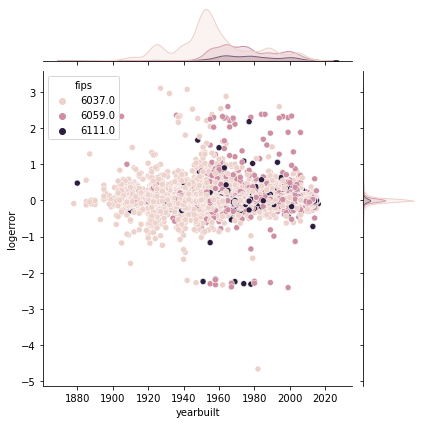

In [31]:
#adding fips as hue
sns.jointplot(x="yearbuilt", y="logerror", hue="fips", data=train)
plt.xlabel("year home was built")
plt.ylabel("log error")
plt.show()

---

##### Question 6:
- Is bathroom count related to logerror?

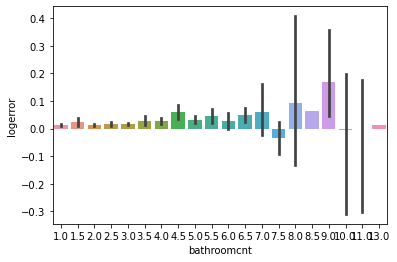

In [33]:
sns.barplot(train.bathroomcnt, train.logerror)
plt.show()

### Remove outiers and rerun explorations

In [34]:
def remove_outliers(df, k, col_list):
    ''' this function will remove outliers from a list of columns in a dataframe 
        and return that dataframe. A list of columns with significant outliers is 
        assigned to a variable in the below wrangle function and can be modified if needed
    '''
    #loop throught the columns in the list
    for col in col_list:
        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        iqr = q3 - q1   # calculate interquartile range
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound
        # return dataframe without outliers
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)] 
    return df

In [35]:
out_columns = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',]
train = remove_outliers(train, 1.5, out_columns)

In [36]:
train.shape

(26097, 30)

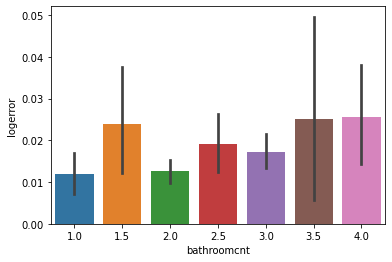

In [37]:
sns.barplot(train.bathroomcnt, train.logerror)
plt.show()

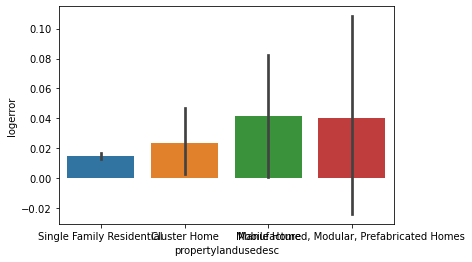

In [38]:
sns.barplot(train.propertylandusedesc, train.logerror)
plt.show()

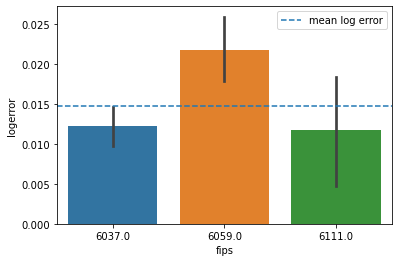

In [108]:
log_mean = train.logerror.mean()
sns.barplot(train.fips, train.logerror)
plt.axhline(log_mean, label='mean log error', linestyle='--')
plt.legend()
plt.show()

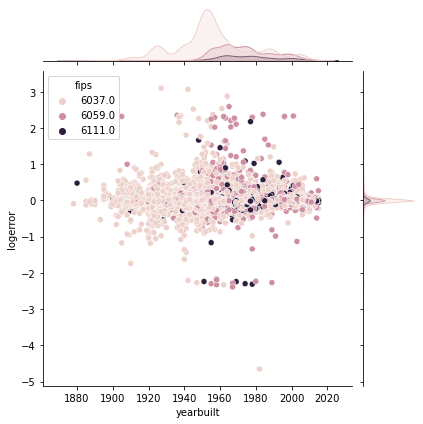

In [39]:
sns.jointplot(x="yearbuilt", y="logerror", hue="fips", data=train)
plt.xlabel("year home was built")
plt.ylabel("log error")
plt.show()

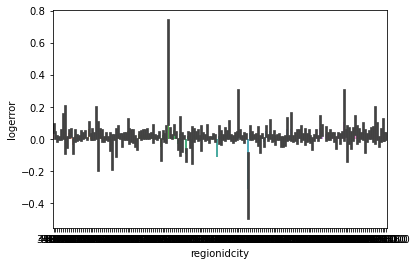

In [40]:
sns.barplot(train.regionidcity, train.logerror)
plt.show()

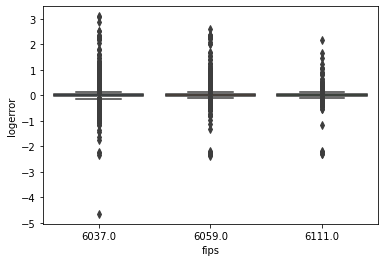

In [41]:
sns.boxplot(train.fips, train.logerror)
plt.show()

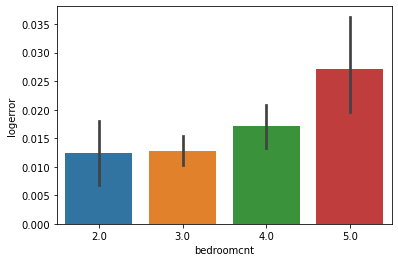

In [43]:
sns.barplot(train.bedroomcnt, train.logerror)
plt.show()

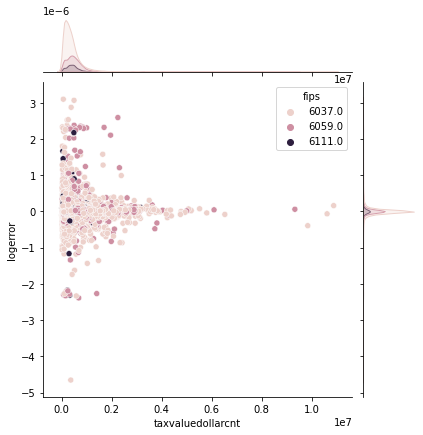

In [44]:
sns.jointplot(x="taxvaluedollarcnt", y="logerror", hue="fips", data=train)
plt.xlabel("home price")
plt.ylabel("log error")
plt.show()

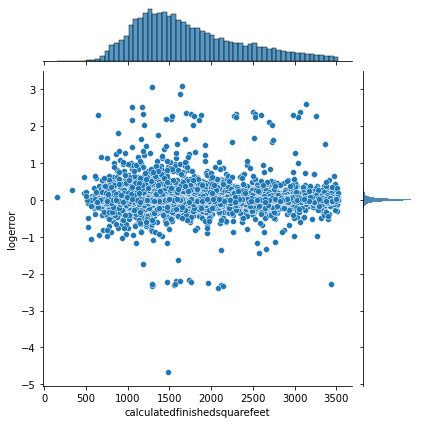

In [47]:
sns.jointplot(x="calculatedfinishedsquarefeet", y="logerror", data=train)
plt.xlabel("home sqr foot")
plt.ylabel("log error")
plt.show()

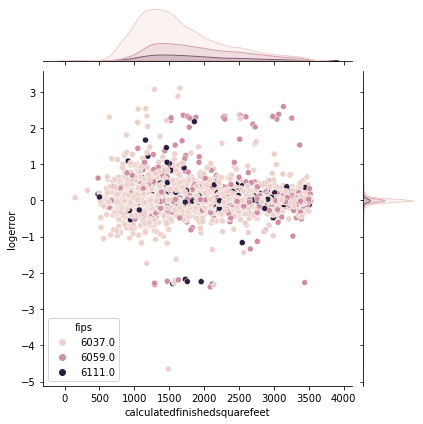

In [46]:
sns.jointplot(x="calculatedfinishedsquarefeet", y="logerror", hue="fips", data=train)
plt.xlabel("home sqr foot")
plt.ylabel("log error")
plt.show()

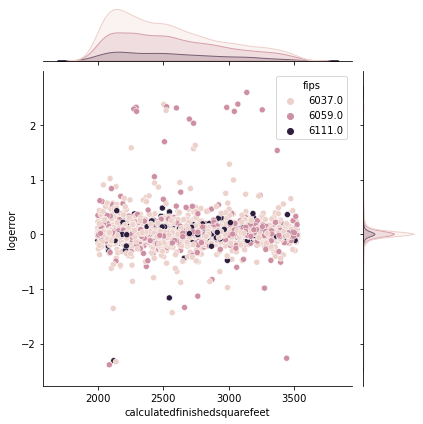

In [51]:
sns.jointplot(x="calculatedfinishedsquarefeet", y="logerror", hue="fips", data=train[train.calculatedfinishedsquarefeet >= 2000])
plt.xlabel("home sqr foot")
plt.ylabel("log error")
plt.show()

In [64]:
high_log = train[train.logerror >= 1]
high_log.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
29083,2905180,14402858,2.5,4.0,2.5,1702.0,1702.0,6059.0,2.0,33535739.0,-117771971.0,5376.0,122,261.0,6.059063e+07,52842.0,1286.0,96969.0,6.0,1.0,1936.0,49404.0,757369.0,2016.0,707965.0,8502.70,6.059063e+13,2.355489,2017-08-16,Single Family Residential
64991,325521,14348824,3.0,5.0,3.0,2600.0,2600.0,6059.0,3.0,33726257.0,-117758628.0,5616.0,122,261.0,6.059052e+07,52650.0,1286.0,96954.0,0.0,1.0,1996.0,295382.0,996864.0,2016.0,701482.0,11757.06,6.059052e+13,2.310381,2017-06-09,Single Family Residential
66768,1279626,14199785,3.0,4.0,3.0,3069.0,3069.0,6059.0,3.0,33891451.0,-117757870.0,22000.0,122,261.0,6.059022e+07,21412.0,1286.0,97079.0,9.0,1.0,1984.0,313972.0,498535.0,2016.0,184563.0,6102.52,6.059022e+13,2.380401,2017-04-18,Single Family Residential
70033,1726398,14018500,2.0,3.0,2.0,1272.0,1272.0,6059.0,2.0,33790420.0,-117894876.0,7688.0,122,261.0,6.059076e+07,33252.0,1286.0,97066.0,7.0,1.0,1958.0,41528.0,73134.0,2016.0,31606.0,1101.54,6.059076e+13,1.269208,2017-07-31,Single Family Residential
18365,763743,11212556,3.0,4.0,3.0,1921.0,1921.0,6037.0,3.0,34571093.0,-118025698.0,7964.0,0100,261.0,6.037911e+07,40227.0,3101.0,97330.0,0.0,1.0,1990.0,153600.0,229000.0,2016.0,75400.0,3708.73,6.037911e+13,1.480816,2017-03-31,Single Family Residential


In [65]:
high_log.regionidcity.value_counts()

12447.0     13
53571.0      5
13693.0      4
40227.0      3
52842.0      2
27491.0      2
46314.0      2
25218.0      2
396054.0     2
52650.0      2
13150.0      2
5534.0       2
33612.0      2
24812.0      1
25621.0      1
34543.0      1
12773.0      1
12292.0      1
40081.0      1
34278.0      1
33252.0      1
21412.0      1
53636.0      1
17686.0      1
22827.0      1
36502.0      1
54722.0      1
50749.0      1
47568.0      1
6395.0       1
26531.0      1
42967.0      1
118994.0     1
54311.0      1
26965.0      1
27110.0      1
51239.0      1
4406.0       1
16764.0      1
30187.0      1
54970.0      1
14542.0      1
10608.0      1
32380.0      1
24174.0      1
17150.0      1
44833.0      1
20008.0      1
Name: regionidcity, dtype: int64

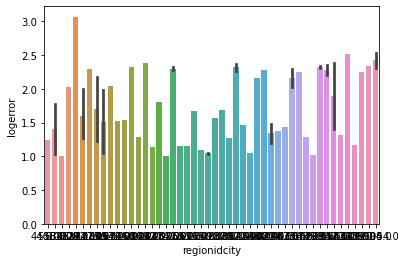

In [66]:
sns.barplot(high_log.regionidcity, high_log.logerror)
plt.show()

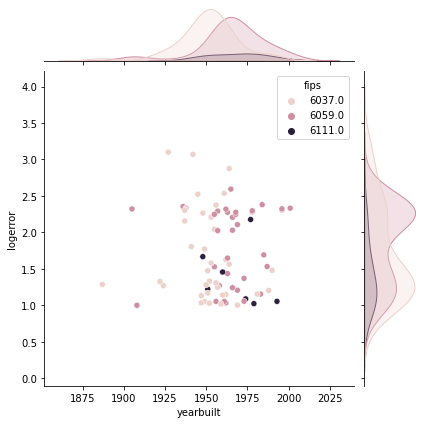

In [67]:
sns.jointplot(x="yearbuilt", y="logerror", hue="fips", data=high_log)
plt.xlabel("home sqr foot")
plt.ylabel("log error")
plt.show()

In [68]:
low_log = train[train.logerror <= -1]
low_log.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
1104,210524,10866354,3.0,4.0,3.0,2568.0,2568.0,6037.0,3.0,34153076.0,-118477066.0,23896.0,0101,261.0,6.037141e+07,12447.0,3101.0,96426.0,0.0,1.0,1941.0,281175.0,1023902.0,2016.0,742727.0,12498.89,6.037141e+13,-1.433675,2017-01-05,Single Family Residential
35925,2710038,14017217,2.0,3.0,2.0,1298.0,1298.0,6059.0,2.0,33854301.0,-118004782.0,7227.0,122,261.0,6.059110e+07,10608.0,1286.0,96180.0,7.0,1.0,1955.0,38777.0,79030.0,2016.0,40253.0,1135.34,6.059110e+13,-2.300184,2017-08-10,Single Family Residential
28979,1914139,11772551,1.0,2.0,1.0,1104.0,1104.0,6037.0,1.0,34013428.0,-118272237.0,5400.0,0100,261.0,6.037231e+07,12447.0,3101.0,95992.0,0.0,1.0,1905.0,34301.0,94339.0,2016.0,60038.0,1205.05,6.037231e+13,-1.172804,2017-08-07,Single Family Residential
27395,1104124,17114185,2.0,3.0,2.0,1732.0,1732.0,6111.0,2.0,34256219.0,-119195712.0,7709.0,1111,261.0,6.111002e+07,34543.0,2061.0,97083.0,6.0,1.0,1958.0,150068.0,230860.0,2016.0,80792.0,2927.20,6.111002e+13,-2.175949,2017-02-24,Single Family Residential
24463,169817,12008161,2.0,3.0,2.0,1470.0,1470.0,6037.0,2.0,34094061.0,-118296767.0,6499.0,0100,261.0,6.037191e+07,12447.0,3101.0,96010.0,0.0,1.0,1921.0,178684.0,568540.0,2016.0,389856.0,6923.31,6.037191e+13,-1.179223,2017-08-14,Single Family Residential


In [92]:
low_log.regionidcity.value_counts()

12447.0     10
16764.0      3
34543.0      2
10608.0      1
51239.0      1
396054.0     1
25459.0      1
26965.0      1
12773.0      1
34278.0      1
29712.0      1
13150.0      1
18874.0      1
8384.0       1
15237.0      1
46298.0      1
Name: regionidcity, dtype: int64

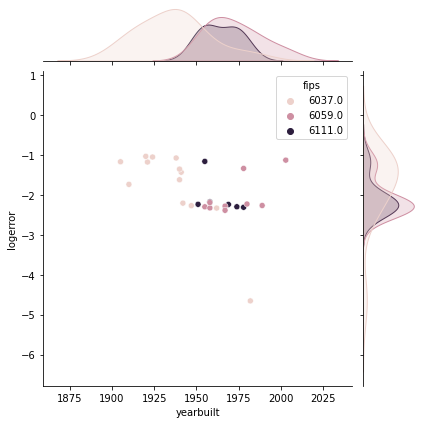

In [69]:
sns.jointplot(x="yearbuilt", y="logerror", hue="fips", data=low_log)
plt.xlabel("home sqr foot")
plt.ylabel("log error")
plt.show()

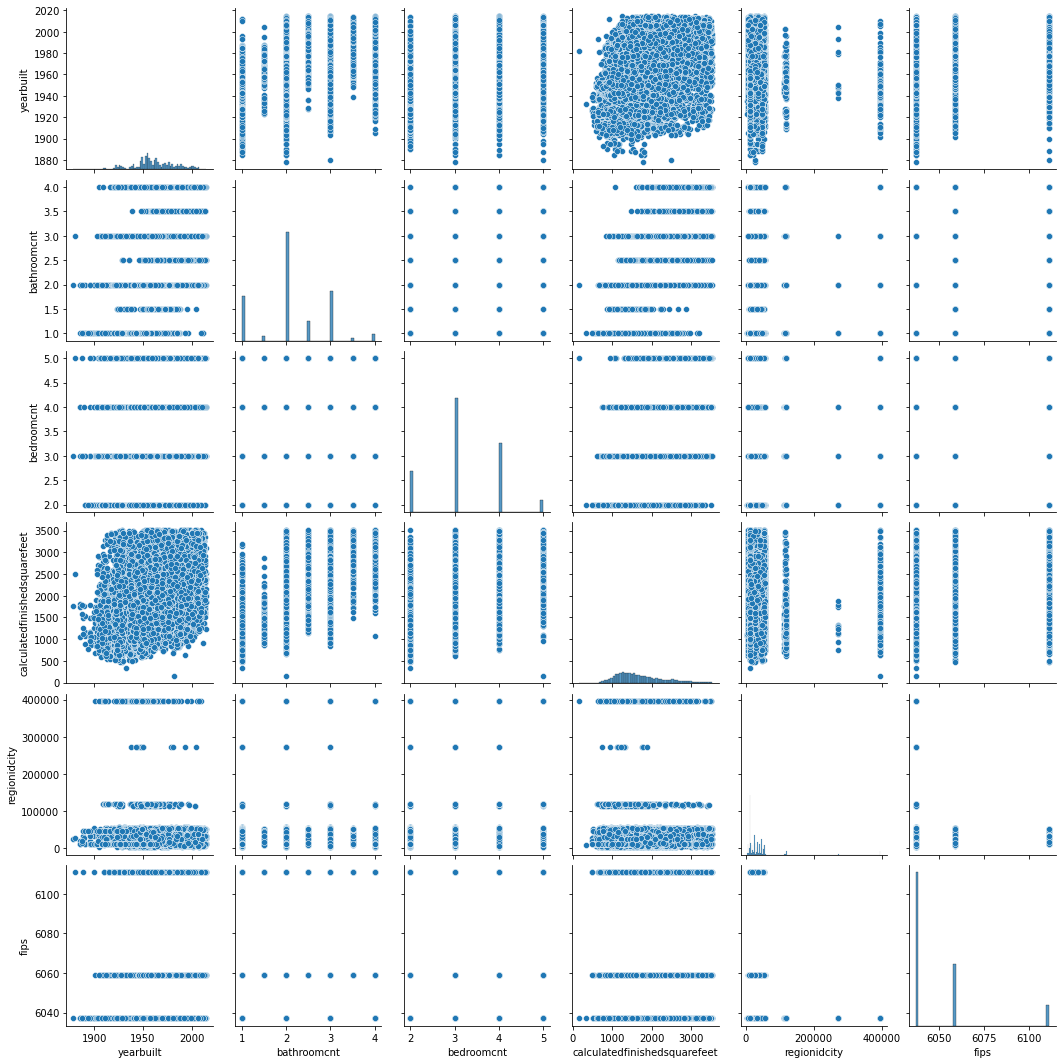

In [72]:
x = train[['yearbuilt', 'bathroomcnt', 'bedroomcnt', "calculatedfinishedsquarefeet", 'regionidcity', 'fips']]
sns.pairplot(x)
plt.show()

In [73]:
train['logerror_bin'] = pd.cut(train.logerror, [-2, -1, 0, 1, 2])

In [78]:
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,logerror_bin
57956,2335449,12844928,3.0,4.0,3.0,2650.0,2650.0,6037.0,3.0,33982542.0,-117921176.0,7566.0,0100,261.0,6.037409e+07,22827.0,3101.0,96492.0,0.0,1.0,1987.0,413700.0,793000.0,2016.0,379300.0,9646.34,6.037409e+13,0.026122,2017-05-26,Single Family Residential,"(0, 1]"
73971,244642,12075460,3.0,3.0,3.0,3094.0,3094.0,6037.0,3.0,34187250.0,-118192425.0,77207.0,010G,261.0,6.037461e+07,46080.0,3101.0,96271.0,0.0,1.0,1949.0,133565.0,231922.0,2016.0,98357.0,3221.28,6.037461e+13,-0.030712,2017-05-31,Single Family Residential,"(-1, 0]"
8195,877004,14282224,2.0,3.0,2.0,1647.0,1647.0,6059.0,2.0,33639152.0,-117900249.0,6000.0,122,261.0,6.059063e+07,38032.0,1286.0,96959.0,6.0,1.0,1958.0,79671.0,1092488.0,2016.0,1012817.0,12046.64,6.059063e+13,-0.013707,2017-08-07,Single Family Residential,"(-1, 0]"
7355,2249559,14393950,1.5,3.0,1.5,1174.0,1174.0,6059.0,1.0,33572200.0,-117707955.0,853.0,122,261.0,6.059042e+07,37086.0,1286.0,96974.0,6.0,1.0,1982.0,93580.0,366000.0,2016.0,272420.0,3744.58,6.059042e+13,0.028213,2017-05-24,Single Family Residential,"(0, 1]"
58226,1156183,12514614,3.0,3.0,3.0,1742.0,1742.0,6037.0,3.0,33794806.0,-118115898.0,6115.0,0100,261.0,6.037574e+07,46298.0,3101.0,96247.0,0.0,1.0,1949.0,164991.0,525213.0,2016.0,360222.0,6283.46,6.037574e+13,-0.002124,2017-06-22,Single Family Residential,"(-1, 0]"


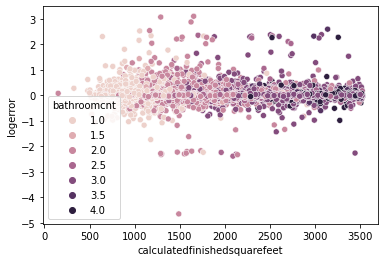

In [83]:
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='bathroomcnt')
plt.show()

In [88]:
train['year_bin'] = pd.cut(train.yearbuilt, [0, 1900, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])


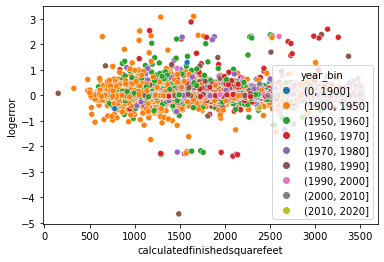

In [89]:
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='year_bin')
plt.show()

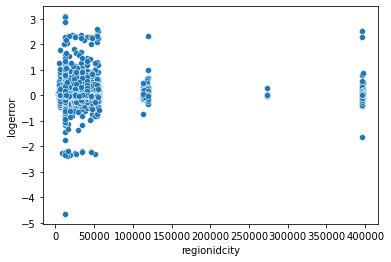

In [91]:
sns.scatterplot(x='regionidcity', y='logerror', data=train)
plt.show()

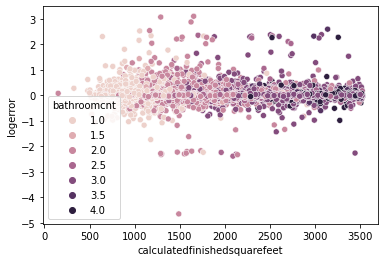

In [105]:
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='bathroomcnt')
plt.show()

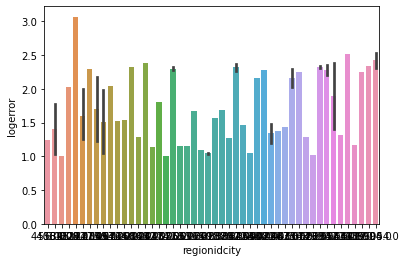

In [93]:
sns.barplot(high_log.regionidcity, high_log.logerror )
plt.show()

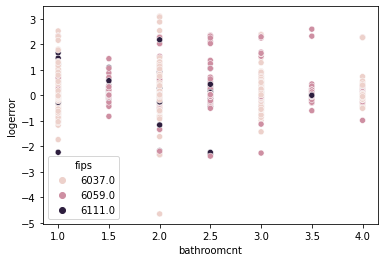

In [95]:
sns.scatterplot(x='bathroomcnt', y='logerror', hue='fips', data=train)
plt.show()

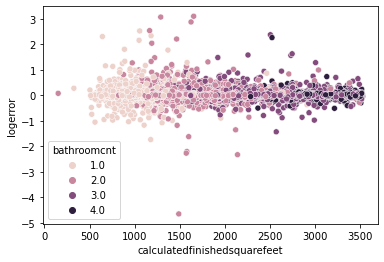

In [96]:
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train[train.fips == 6037], hue='bathroomcnt')
plt.show()

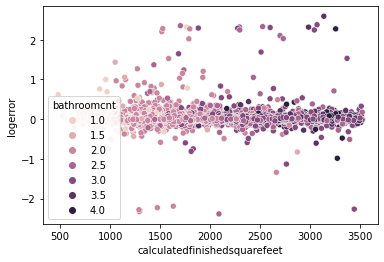

In [97]:
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train[train.fips == 6059], hue='bathroomcnt')
plt.show()

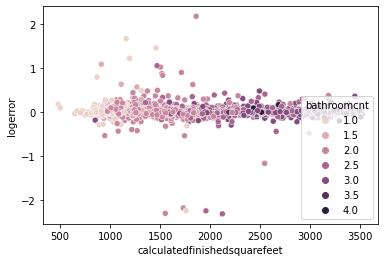

In [98]:
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train[train.fips == 6111], hue='bathroomcnt')
plt.show()

In [101]:
train.propertylandusedesc.value_counts()

Single Family Residential                     25893
Cluster Home                                    164
Mobile Home                                      35
Manufactured, Modular, Prefabricated Homes        5
Name: propertylandusedesc, dtype: int64

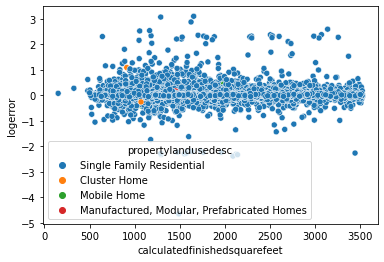

In [103]:
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='propertylandusedesc')
plt.show()

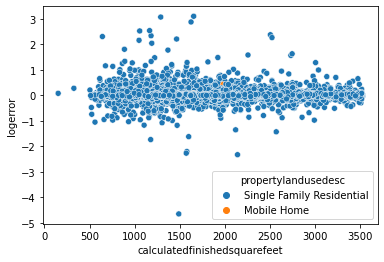

In [110]:
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train[train.fips == 6037], hue='propertylandusedesc')
plt.show()

In [111]:
fip_prop_1 = train[train.fips == 6037]
fip_prop_1.propertylandusedesc.value_counts()

Single Family Residential    16944
Mobile Home                     31
Name: propertylandusedesc, dtype: int64

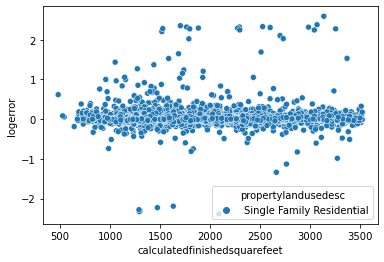

In [112]:
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train[train.fips == 6059], hue='propertylandusedesc')
plt.show()

In [113]:
fip_prop_2 = train[train.fips == 6059]
fip_prop_2.propertylandusedesc.value_counts()

Single Family Residential    6803
Name: propertylandusedesc, dtype: int64

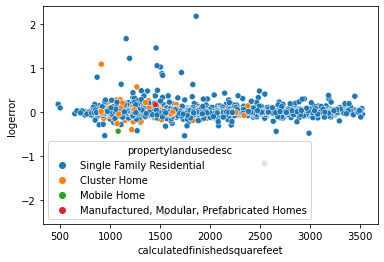

In [114]:
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train[train.fips == 6111], hue='propertylandusedesc')
plt.show()

In [115]:
fip_prop_3 = train[train.fips == 6111]
fip_prop_3.propertylandusedesc.value_counts()

Single Family Residential                     2146
Cluster Home                                   164
Manufactured, Modular, Prefabricated Homes       5
Mobile Home                                      4
Name: propertylandusedesc, dtype: int64

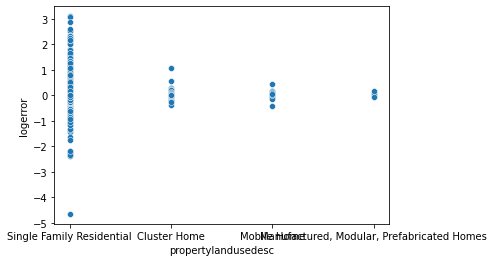

In [104]:
sns.scatterplot(x='propertylandusedesc', y='logerror', data=train)
plt.show()

In [ ]:
sns.scatterplot(x='propertylandusedesc', y='logerror', data=train)
plt.show()

In [116]:
train['bedroom_bin'] = pd.cut(train.bedroomcnt, [0, 3.5, 5])


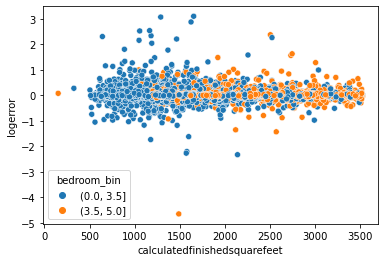

In [117]:
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train[train.fips == 6037], hue='bedroom_bin')
plt.show()

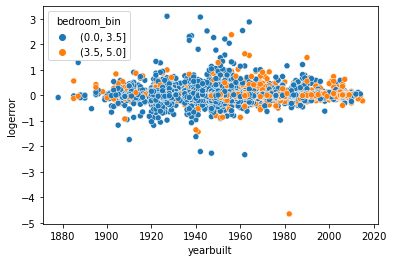

In [118]:
sns.scatterplot(x='yearbuilt', y='logerror', data=train[train.fips == 6037], hue='bedroom_bin')
plt.show()

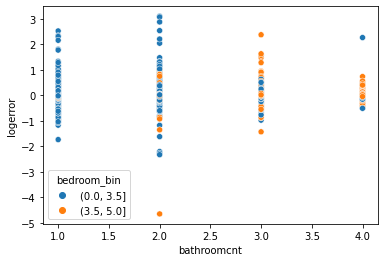

In [119]:
sns.scatterplot(x='bathroomcnt', y='logerror', data=train[train.fips == 6037], hue='bedroom_bin')
plt.show()

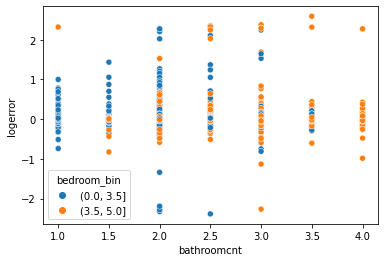

In [121]:
sns.scatterplot(x='bathroomcnt', y='logerror', data=train[train.fips == 6059], hue='bedroom_bin')
plt.show()

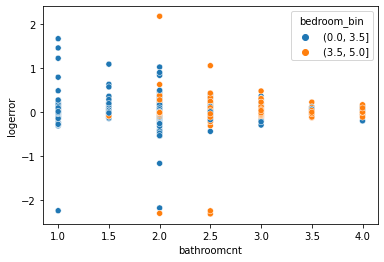

In [122]:
sns.scatterplot(x='bathroomcnt', y='logerror', data=train[train.fips == 6111], hue='bedroom_bin')
plt.show()

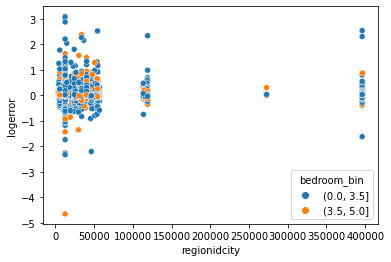

In [120]:
sns.scatterplot(x='regionidcity', y='logerror', data=train[train.fips == 6037], hue='bedroom_bin')
plt.show()